In [81]:
reload_toocan = False # part of code that takes long time

<span style="color:pink">## choose subregion</span>

In [2]:
lon_min_subregion = 130
lon_max_subregion = 165
lat_min_subregion = 0
lat_max_subregion = 20

<span style="color:pink">## choose attribute (listed in code below in toocan[0])</span>

In [3]:
attribute = "dist"

<span style="color:pink">## choose MCS index and attribute (when plotting a single MCS, which MCS do you want to look at? Which attribute?). attributes listed in code blow in under toocan[36].clusters</span>

In [4]:
MCS_idx = 0
attribute_single_MCS = "surfkm2_132Wm2"

<span style="color:pink">## choose single timestep index for prec</span>

In [5]:
prec_idx = 5

<span style="color:pink">## choose extreme percentile</span>

In [6]:
percentile = 99.999

<span style="color:pink">##</span>

# Imports

In [68]:
%reload_ext autoreload
%matplotlib inline

In [69]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [70]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [71]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [72]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [73]:
if reload_toocan == True:
    toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [74]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

# Convert dates

In [75]:
data_reference = dt.datetime(1970, 1, 1)

In [76]:
def convertSingleDate(unconverted_date):
    unconverted_date = str(unconverted_date)
    date_split = unconverted_date.split('.')
    
    if len(date_split[1]) == 1: # adding a zero in case of "1704.1", "1704.2", etc so that "1","2" are interpreted as "10","20"
        date_split[1] = date_split[1] + '0'
    
    date_converted = data_reference + dt.timedelta(days=int(date_split[0])) + dt.timedelta(hours=( int(date_split[1]) / 2) )
    return date_converted

def convertDate(attribute, data): # Does not work with localtime_Init or localtime_End
    dates_list = []
    for obj in data:
        date = str( getattr(obj, attribute) ) 
        date_split = date.split('.')
        
        if len(date_split[1]) == 1: # adding a zero in case of "1704.1", "1704.2", etc so that "1","2" are interpreted as "10","20"
            date_split[1] = date_split[1] + '0'
        
        date_converted = data_reference + dt.timedelta(days=int(date_split[0])) + dt.timedelta(hours=( int(date_split[1]) / 2) )
        dates_list.append(date_converted)    
    return dates_list

def convertDateCluster(attribute, data): # Does not work with Localtime
    date_list_final = []
    for obj in data:
        date_list_0 = getattr(obj.clusters, attribute)
        date_list_1 = []
        for time in date_list_0:
            date = str(time)
            date_split = date.split('.')
            
            if len(date_split[1]) == 1: # adding a zero in case of "1704.1", "1704.2", etc so that "1","2" are interpreted as "10","20"
                date_split[1] = date_split[1] + '0'
            
            date_converted = data_reference + dt.timedelta(days=int(date_split[0])) + dt.timedelta(hours=( int(date_split[1]) / 2) )
            date_list_1.append(date_converted)
        date_list_final.append(date_list_1)
    return date_list_final

def attr_list(data, attr_name):
    # Extract the attribute values from the data
    attribute_values = [getattr(obj, attr_name) for obj in data]
    return attribute_values

def binTimeData_by_mins(data, bins, n_min):
    count_per_bin = [0] * len(bins)
    # iterate over each value in data
    for d in data:
        # find the index of the first bin that the value falls into
        bin_index = np.where((d >= bins) & (d < bins + pd.Timedelta(minutes=n_min)))[0]
        if bin_index:
            count_per_bin[bin_index[0]] += 1  # increment count
    
    return count_per_bin

def binTimeData_by_step(data, bins, step):
    count_per_bin = [0] * len(bins)
    
    # iterate over each value in data
    for d in data:
        # find the index of the first bin that the value falls into
        bin_index = np.where((d >= bins) & (d < bins + step))[0]
        if bin_index:
            count_per_bin[bin_index[0]] += 1  # increment count
    
    return count_per_bin

In [106]:
Utime_Init_list = convertDate("Utime_Init", toocan)
Utime_End_list = convertDate("Utime_End", toocan)

Utime_list = convertDateCluster("Utime", toocan)

# MCS attribute histogram

<span style="color:pink">## choose number of bins</span>

In [107]:
nbins = 80

<span style="color:pink">##</span>

In [108]:
# print(attribute)
attribute_list = attr_list(toocan, attribute)

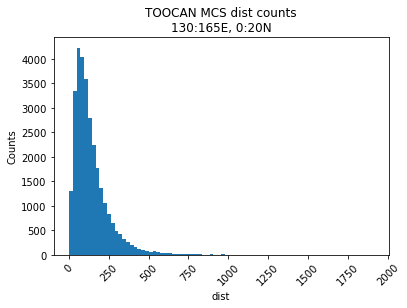

In [109]:
hist, bin_edges, _ = plt.hist(attribute_list, bins=nbins)
plt.xlabel(attribute)
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.title(f"TOOCAN MCS {attribute} counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")
plt.show()
# plt.savefig(f'histograms/TOOCAN_{attribute}_hist_test.png')

# Variable mean for each binned timestep
* note: for plot of mean, the xlabel for each bar is of the upper bin edge

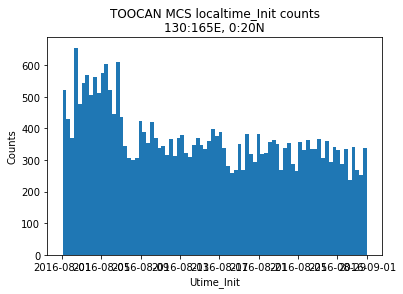

In [142]:
#-- binning times

Utime_Init_hist, Utime_Init_bin_edges, Utime_Init__ = plt.hist(Utime_Init_list, bins=nbins)
plt.xlabel("Utime_Init")
plt.ylabel("Counts")
plt.title(f"TOOCAN MCS Utime_Init counts\n{lon_min_subregion}:{lon_max_subregion}E, {lat_min_subregion}:{lat_max_subregion}N")
plt.show()

# Variable over time

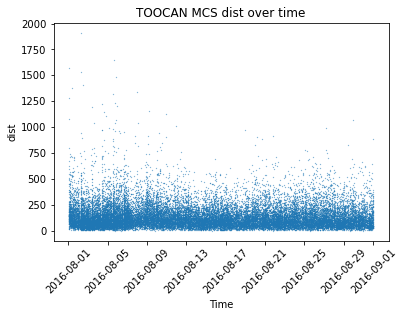

In [112]:
plt.scatter(Utime_Init_list, attribute_list, s=0.05)
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel(f"{attribute}")
plt.title(f"TOOCAN MCS {attribute} over time")
plt.show()

# (Line graphs) Variable mean for each timestep

In [95]:
# Extract the values of the attribute from the objects
attribute_values_list = attr_list(toocan, attribute)

In [96]:
# Convert the lists to NumPy arrays for easier manipulation
Utime_Init_list = np.array(Utime_Init_list)
attribute_values_list = np.array(attribute_values_list)

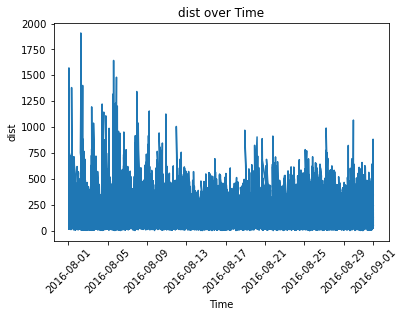

In [143]:
# Plot the  values against the unique dates
plt.plot(Utime_Init_list, attribute_values_list)

plt.xticks(rotation=45)
# Set labels and title
plt.xlabel('Time')
plt.ylabel(attribute)
plt.title(attribute + ' over Time')

# Display the plot
plt.show()

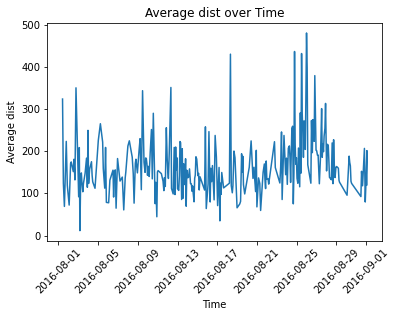

285


In [114]:
# convert Utime_Init_list to timestamps in seconds
timestamps = np.array([(date - dt.datetime(1970, 1, 1)).total_seconds() for date in Utime_Init_list])

# interval in seconds
interval_seconds = 1 * 60 * 60  # 1 hour

# average attribute values for each time interval
averaged_values = []
start_time = timestamps[0]
sum_values = 0
count = 0

end_interval_times = []

for timestamp, value in zip(timestamps, attribute_values_list):
    if timestamp - start_time <= interval_seconds:
        sum_values += value
        count += 1
    else:
        averaged_values.append(sum_values / count)
        sum_values = value
        count = 1
        start_time = timestamp
        end_interval_times.append(timestamp)

# append the average of the last interval
averaged_values.append(sum_values / count)
end_interval_times.append(timestamp)


# convert end_interval_times to datetime
end_interval_times = [dt.datetime.fromtimestamp(timestamp) for timestamp in end_interval_times]
plt.plot(end_interval_times, averaged_values)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Average ' + attribute)
plt.title('Average ' + attribute + ' over Time')
plt.show()
print(len(averaged_values))

# One MCS attribute over time

In [127]:
#- data spaced out in 30-minute intervals
MCS_attr = getattr(toocan[MCS_idx].clusters, attribute_single_MCS)

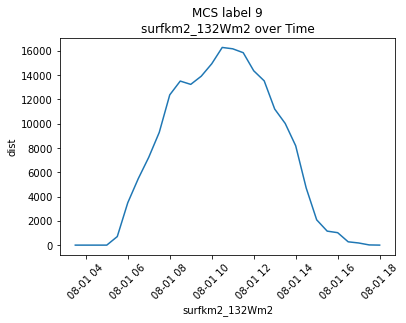

In [129]:
#-- Plot

# Create a figure and axes
fig, ax = plt.subplots()

plt.plot(Utime_list[MCS_idx], MCS_attr)

plt.xticks(rotation=45)
ax.set_xlabel(f'{attribute_single_MCS}')
plt.ylabel(attribute)
plt.title(f"MCS label {toocan[MCS_idx].label}\n{attribute_single_MCS} over Time")


plt.show()

# Evolution of MCS linked to extreme precipitation
1. Select MCS tied to extreme precip.
2. Trace birth of MCS
3. Plot time series of MCS variable

### single timestep

In [131]:
prec = loadPrec(prec_idx,df)
# Replace negative values with NaN
prec = xr.where(prec < 0, np.nan, prec)

In [132]:
prec.max()

<xarray.DataArray 'Precac' ()>
array(49.83415604)

In [133]:
threshold = np.nanpercentile(prec, percentile)

In [134]:
extreme_values = xr.where(prec >= threshold, prec, np.nan)
extreme_values_lon = extreme_values.lon.values
extreme_values_lat = extreme_values.lat.values

# convert to numpy array
extreme_values_np = extreme_values.values

# get non-NaN values and their coordinates
non_nan_values = extreme_values_np[~np.isnan(extreme_values_np)]
non_nan_indices = np.argwhere(~np.isnan(extreme_values_np))


ex_val_list, ex_lon_list, ex_lat_list = [], [], []

for index in non_nan_indices:
    value = extreme_values_np[tuple(index)]
    lon = extreme_values_lon[index[1]]
    lat = extreme_values_lat[index[0]]
    print(f"Value: {value}, Lon: {lon}, Lat: {lat}")
    ex_val_list.append(value)
    ex_lon_list.append(lon)
    ex_lat_list.append(lat)
combined_ex_list = list(zip(ex_lat_list, ex_lon_list))
print(combined_ex_list)

Value: 42.51411056518555, Lon: 157.83201599121094, Lat: 14.080078125
Value: 44.30144500732422, Lon: 157.83201599121094, Lat: 14.118706703186035
Value: 46.47736358642578, Lon: 158.18357849121094, Lat: 14.15733528137207
Value: 47.186607360839844, Lon: 158.22264099121094, Lat: 14.15733528137207
Value: 49.83415603637695, Lon: 157.83201599121094, Lat: 14.23459243774414
[(14.080078, 157.83202), (14.118707, 157.83202), (14.157335, 158.18358), (14.157335, 158.22264), (14.234592, 157.83202)]


In [135]:
# load MCS labels for this timestep
root_toocan = df.iloc[prec_idx]['img_seg_path']
corresponding_toocan = xr.open_dataarray(os.path.join("/",root_toocan), engine='netcdf4').load()[0]
combined_corr_toocan_coords = list(zip(corresponding_toocan.latitude, corresponding_toocan.longitude))

/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [136]:
label_list, MCS_index_list = [], []
for lat_0, lon_0 in combined_ex_list:
    i_0 = (np.where(corresponding_toocan.latitude > lat_0))[0][0]
    j_0 = (np.where(corresponding_toocan.longitude > lon_0))[0][0]
    
    label = corresponding_toocan[i_0, j_0]
    label_list.append(label)
    MCS_index_list.append(label - 1)

In [137]:
print(MCS_index_list[0])

<xarray.DataArray 'MCS_label' ()>
array(208.)
Coordinates:
    latitude   float32 14.12
    longitude  float32 157.9
    time       datetime64[ns] 2016-08-01T03:30:00


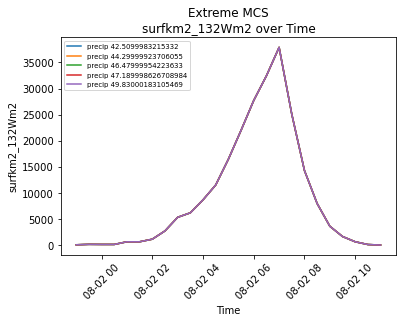

In [138]:
fig, ax = plt.subplots()
for MCS in range(len(MCS_index_list)):
    MCS_ex = MCS_index_list[MCS]
    MCS_ex_idx = int(MCS_ex.item())
    MCS_attr_ex = getattr(toocan[MCS_ex_idx].clusters, attribute_single_MCS)


    plt.plot(Utime_list[MCS_ex_idx], MCS_attr_ex, label=f"precip {round(ex_val_list[MCS],2)}")

plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_single_MCS}')
plt.title(f"Extreme MCS\n{attribute_single_MCS} over Time")
plt.legend(fontsize='x-small')

plt.show()

### multiple timesteps
* ignores the first timestep

In [139]:
fixed_threshold = 80
TESTING = True

if TESTING == True:
    df_len = 50
else:
    df_len = len(df)

In [140]:
multiple_MCS_index_list = []
multiple_ex_val_list = []

for df_i in range(df_len):
    if not df_i == 0:
        print(df_i)
        prec_i = loadPrec(df_i,df)
        # Replace negative values with NaN
        prec_i = xr.where(prec_i < 0, np.nan, prec_i)
        
        extreme_values_i = xr.where(prec_i >= fixed_threshold, prec_i, np.nan)
        extreme_values_lon_i = extreme_values_i.lon.values
        extreme_values_lat_i = extreme_values_i.lat.values

        # convert to numpy array
        extreme_values_np_i = extreme_values_i.values

        # get non-NaN values and their coordinates
        non_nan_values_i = extreme_values_np_i[~np.isnan(extreme_values_np_i)]
        non_nan_indices_i = np.argwhere(~np.isnan(extreme_values_np_i))


        ex_val_list_i, ex_lon_list_i, ex_lat_list_i = [], [], []

        for index_i in non_nan_indices_i:
            value_i = extreme_values_np_i[tuple(index_i)]
            lon_i = extreme_values_lon_i[index_i[1]]
            lat_i = extreme_values_lat_i[index_i[0]]
#             print(f"Value: {value_i}, Lon: {lon_i}, Lat: {lat_i}")
            ex_val_list_i.append(value_i)
            ex_lon_list_i.append(lon_i)
            ex_lat_list_i.append(lat_i)
        multiple_ex_val_list.append(ex_val_list_i)
        combined_ex_list_i = list(zip(ex_lat_list_i, ex_lon_list_i))
        
        
        
        # load MCS labels for this timestep
        root_toocan_i = df.iloc[df_i]['img_seg_path']
        corresponding_toocan_i = xr.open_dataarray(os.path.join("/",root_toocan_i), engine='netcdf4').load()[0]
        combined_corr_toocan_coords_i = list(zip(corresponding_toocan_i.latitude, corresponding_toocan_i.longitude))
        
        
        # Get corresponding MCS label
        label_list_i, MCS_index_list_i = [], []
        for lat_0_i, lon_0_i in combined_ex_list_i:
            i_0_i = (np.where(corresponding_toocan_i.latitude > lat_0_i))[0][0]
            j_0_i = (np.where(corresponding_toocan_i.longitude > lon_0_i))[0][0]

            label_i = corresponding_toocan_i[i_0_i, j_0_i]
            label_list_i.append(label_i)
            MCS_index_list_i.append(label_i - 1)
        multiple_MCS_index_list.append(MCS_index_list_i)

1


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


2


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


3


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


4


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


5


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


6


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


7


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


8


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


9


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


10


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


11


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


12


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


13


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


14


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


15


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


16


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


17


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


18


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


19


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


20


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


21


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


22


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


23


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


24


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


25


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


26


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


27


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


28


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


29


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


30


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


31


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


32


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


33


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


34


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


35


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


36


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


37


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


38


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


39


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


40


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


41


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


42


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


43


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


44


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


45


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


46


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


47


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


48


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


49


/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


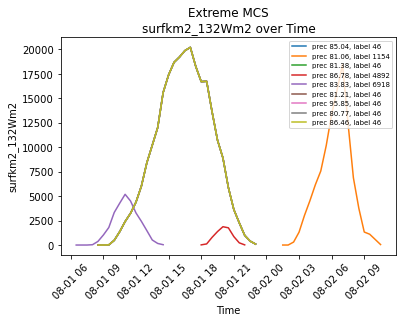

In [141]:
from decimal import Decimal, ROUND_HALF_UP
fig, ax = plt.subplots()
plotted_indices = set()  # Set to store already plotted MCS_ex_idx values


for idx, mcs_idx_list in enumerate(multiple_MCS_index_list):
    if mcs_idx_list: # if list is not empty
        
        for MCS in range(len(mcs_idx_list)):
            MCS_ex = mcs_idx_list[MCS]
            if not math.isnan(MCS_ex.item()):
                MCS_ex_idx = int(MCS_ex.item())
                MCS_attr_ex = getattr(toocan[MCS_ex_idx].clusters, attribute_single_MCS)

                num = Decimal(f"{multiple_ex_val_list[idx][MCS]}")
                rounded_num = num.quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
                plt.plot(Utime_list[MCS_ex_idx], MCS_attr_ex, label=f"prec {rounded_num}, label {toocan[MCS_ex_idx].label}") # , label=f"precip {round(ex_val_list_i[MCS],2)}"
                plotted_indices.add(MCS_ex_idx)  # Add MCS_ex_idx to plotted indices
                    
plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_single_MCS}')
plt.title(f"Extreme MCS\n{attribute_single_MCS} over Time")
plt.legend(fontsize='x-small')

plt.show()